In [10]:
import cv2
import numpy as np
from keras.applications.mobilenet import MobileNet, preprocess_input
from keras.applications.mobilenet import decode_predictions
import matplotlib.pyplot as plt

In [11]:
# Загрузка модели MobileNet
model = MobileNet(weights='imagenet')

In [14]:
# Загружаем видео
cap = cv2.VideoCapture('video.mp4')

# Здесь будем хранить кадры с найденными объектами.
frames_with_objects = []

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Предобработка кадра:
    input_frame = cv2.resize(frame, (224, 224))
    input_frame = np.expand_dims(input_frame, axis=0)
    input_frame = preprocess_input(input_frame)

    # Получение предсказаний
    preds = model.predict(input_frame)
    decoded_preds = decode_predictions(preds, top=3)[0]

    # Проверка на наличие объекта:
    if decoded_preds[0][2] > 0.8:
        frames_with_objects.append(frame)
        label = f"{decoded_preds[0][1]}: {decoded_preds[0][2]:.2f}"
        cv2.putText(frame, label, (15, 40), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)

cap.release()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━

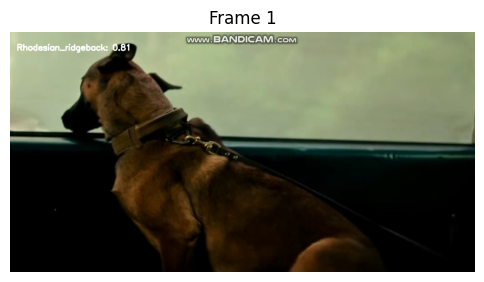

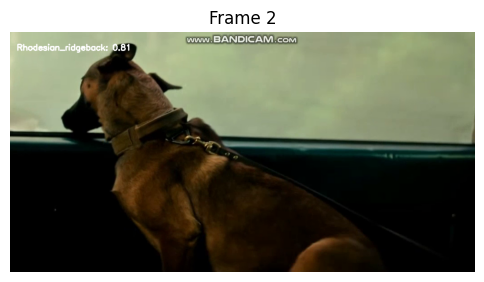

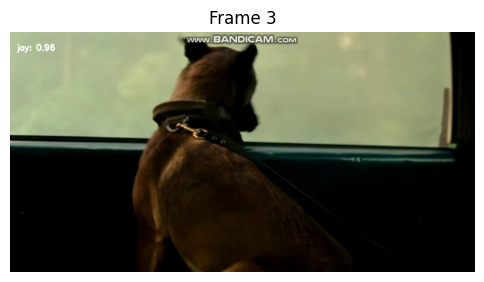

In [15]:
# Выводим найденные кадры.
for i in range(len(frames_with_objects)):
    plt.figure(figsize=(6, 6))
    plt.imshow(cv2.cvtColor(frames_with_objects[i], cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(f'Frame {i + 1}')
    plt.show()